# Conjugate Gradient method Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Function definition and it's gradient

In [2]:
# Function  
def f(x):
    x1, x2 = x[0], x[1]
    return 10*x1**2 + 5*x1*x2 + 10*(x2 - 3)**2

# Gradient 
def grad_f(x):
    x1, x2 = x[0], x[1]
    df_dx1 = 20*x1 + 5*x2
    df_dx2 = 5*x1 + 20*(x2 - 3)
    return np.array([df_dx1, df_dx2])

# Analytical closed-form solution: solve grad f = 0
H = np.array([[20., 5.],
              [ 5., 20.]]) # Hessian matrix

b = np.array([0., 60.]) # from gradient calculation

x_closed = np.linalg.solve(H, b)
f_closed = f(x_closed)


### Conjugate Gradient method 


In [3]:
def conjugate_gradient(H,b,x0,tol=1e-3,max_iter=1000):
    x = x0.copy().astype(float)
    r = b - H@x; p = r.copy(); rs_old = r@r
    for it in range(max_iter):
        if np.sqrt(rs_old)<tol: break
        alpha = rs_old/(p@H@p)
        x += alpha*p
        r -= alpha*H@p
        rs_new = r@r
        if np.sqrt(rs_new)<tol: break
        p = r + (rs_new/rs_old)*p
        rs_old = rs_new
    return x,it+1

## Run optimization

In [4]:
x0 = np.array([10.,15.])
x_cg,iters = conjugate_gradient(H,b,x0)
print("CG minimizer:", x_cg, "f(x) =", f(x_cg), "iters:", iters)


CG minimizer: [-0.8  3.2] f(x) = -6.0 iters: 2


## Plotting

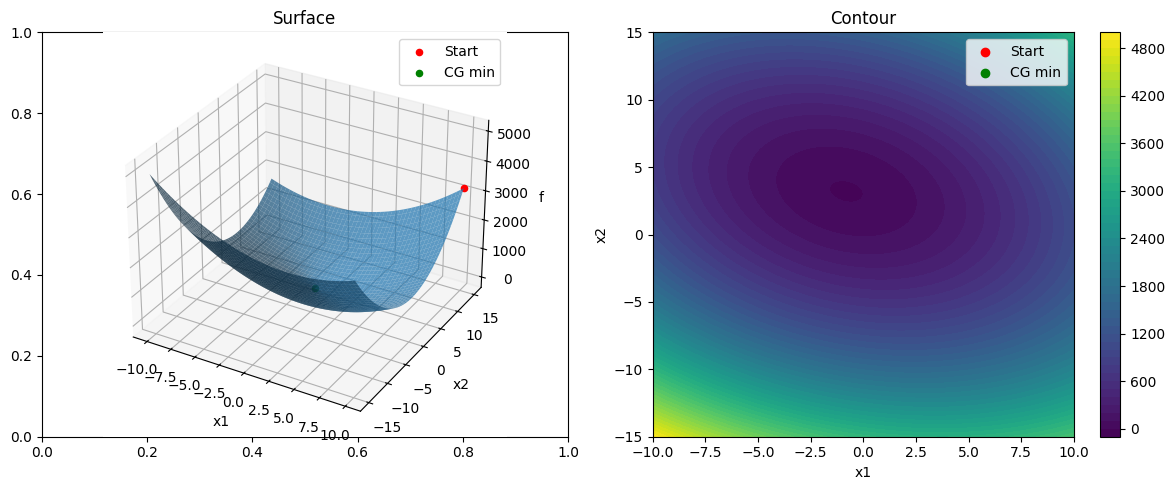

In [5]:
# Surface  
x1 = np.linspace(-10,10,200); x2 = np.linspace(-15,15,200)
X1,X2 = np.meshgrid(x1,x2); F = 10*X1**2 + 5*X1*X2 + 10*(X2-3)**2

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

# 3D surface
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.plot_surface(X1,X2,F,alpha=.7)
ax1.scatter(x0[0],x0[1],f(x0),c='r',label='Start')
ax1.scatter(x_cg[0],x_cg[1],f(x_cg),c='g',label='CG min')
ax1.set_title('Surface'); ax1.set_xlabel('x1'); ax1.set_ylabel('x2'); ax1.set_zlabel('f'); ax1.legend()

# Contour
ax2.contourf(X1,X2,F,60)
ax2.scatter(x0[0],x0[1],c='r',label='Start'); ax2.scatter(x_cg[0],x_cg[1],c='g',label='CG min')
ax2.set_title('Contour'); ax2.set_xlabel('x1'); ax2.set_ylabel('x2'); ax2.legend()
plt.colorbar(ax2.contourf(X1,X2,F,60),ax=ax2)
plt.tight_layout(); plt.show()
